# Load Library

In [1]:
# Load Library
import warnings
warnings.filterwarnings("ignore")

## Import Library
# Dataframe Library
from pandas import read_csv
import pandas as pd
# Keras Library
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,LSTM, Input, TimeDistributed
from keras import regularizers
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping # TensorBoard,
from keras.layers.convolutional import Conv1D
from keras.optimizers import Adam

## Utility / Other Library
import numpy as np
#from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from scipy import spatial
from matplotlib import pyplot as plt
### Setting Random Seeds for reproducibility
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)
import os
os.environ['PYTHONHASHSEED']='0'
import random as rn
rn.seed(1234)

# Save and load model
from keras.models import model_from_json

Using TensorFlow backend.


# Necessary Functions

In [2]:
# Necessary Functions
## Scale the Data from [-1 to 1] t use it in LSTM, [0 to 1] can also be used
def Normalizer(DataValue):
    # normalize the dataset
    scaler  = MinMaxScaler(feature_range=(-1, 1))
    dataset = scaler.fit_transform(DataValue)
    return dataset, scaler

def PredictionError(Data,model,Batch_Size):
    X = Data[:,0:-1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    yhat = model.predict(X, batch_size=Batch_Size)
    return yhat

# invert scaling for forecast
def Inverse_Scaling(Test_Predict, scale, test):
    # Prediction data
    y_pred = np.concatenate((test[:, 0:-1],Test_Predict), axis=1)
    y_pred = scale.inverse_transform(y_pred)
    y_pred = y_pred[:,-1]

    # True Data
    y_true=scale.inverse_transform(test)
    y_true=y_true[:,-1]

    return y_pred, y_true


# Input Parameters 

In [3]:
# Input Parameters (Architecture Dynamic LSTM NN)
batch_size   = 1;
Number_of_Test_Data = 20;
sheets = [2]
print('Patient Numbers:', sheets)

Patient Numbers: [2]


# load model

In [4]:
# load model and weights
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("_[TF_DTW_February_2020]_Model_Weight_Random_8_33.33.h5")
print("Loading Complete!!")

Loading Complete!!


# Read Data

In [5]:
# Read Data
DataClean = pd.ExcelFile('final_cleaned_data8.xlsx')
Sheets_to_access = sheets-np.ones([1,np.shape(sheets )[0]])
Predictions_for_the_Test_Case = []
series = DataClean.parse(int(Sheets_to_access), header=0, parse_dates=[0], index_col=0, squeeze=True)
# Scaling the Data
X,scale = Normalizer(series.values)
# Split the Data into Test - Train
train, test = X[0:-Number_of_Test_Data], X [-Number_of_Test_Data:]

In [6]:
print ('##########################################')
print ('Patient Number:', int(Sheets_to_access+1))
print ('Size of Training Data:',np.shape(train))
print ('Size of Testing Data:',np.shape(test))
print ('##########################################')

##########################################
Patient Number: 2
Size of Training Data: (122, 7)
Size of Testing Data: (20, 7)
##########################################


# Perform prediction

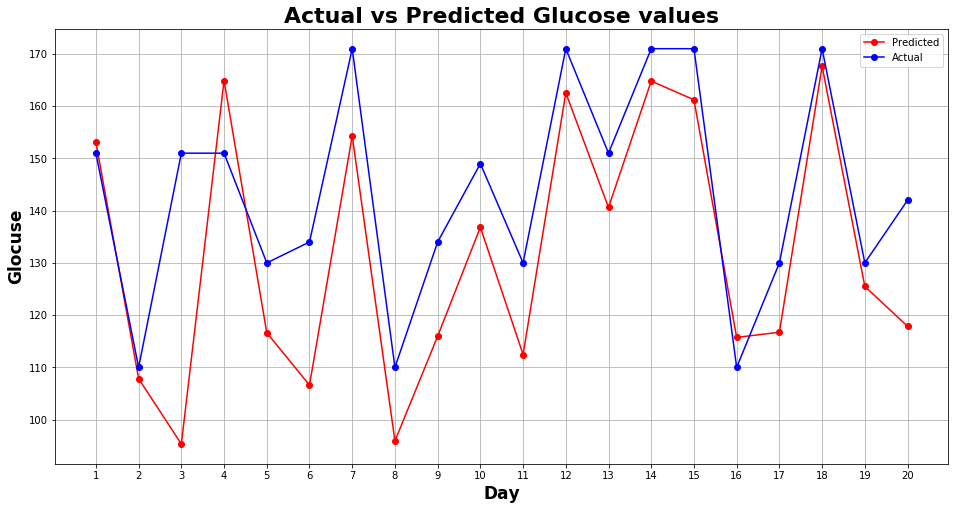

In [9]:
# Perform prediction
Test_Predict = PredictionError(test,loaded_model,batch_size)
y_pred, y_true = Inverse_Scaling(Test_Predict, scale, test)
# Plot it
plt.figure(figsize=(16,8))
plt.plot(y_pred,'ro-',label='Predicted')
plt.plot(y_true,'bo-',label='Actual')
plt.xlabel('Day',fontweight='bold', fontsize='17')
plt.ylabel('Glocuse',fontweight='bold', fontsize='17')
plt.title('Actual vs Predicted Glucose values',fontweight='bold', fontsize='22')
plt.xticks(np.arange(0,20),np.arange(1,21))
plt.legend()
plt.grid()